In [2]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from datetime import datetime as dt
import pickle
from sklearn.externals import joblib

In [3]:
searched_date='original'
df=pd.read_csv('intermediate_data/preprocessed_spec_iqr1_{}.csv'.format(searched_date))
df=df.drop(df.columns[0],axis=1)
df= df.astype('float')

In [3]:
X = df.drop('price', axis=1).as_matrix()
y = df['price']
indices=df.index

#データをわける
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test, index_train,index_test = train_test_split(X, y,indices, test_size = 0.1, random_state = 666)

In [4]:
# Grid Search
params={'n_estimators':[3500,4000,4500], #3000,5000を実施して3000
                'max_depth':[10,20,30,40], #20,50,100で実施して50
                'criterion':['mse'],
                'min_samples_leaf':[1],
                'min_weight_fraction_leaf':[0],
                'random_state':[1],
                'n_jobs':[-1]
}

rf_model=RandomForestRegressor()
gs = GridSearchCV(rf_model,params)
gs.fit(X_train,y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [3500, 4000, 4500], 'max_depth': [10, 20, 30, 40], 'criterion': ['mse'], 'min_samples_leaf': [1], 'min_weight_fraction_leaf': [0], 'random_state': [1], 'n_jobs': [-1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [5]:
y_test_pred = gs.predict(X_test)
y_train_pred =gs.predict(X_train)
gs.best_params_

{'criterion': 'mse',
 'max_depth': 30,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0,
 'n_estimators': 4000,
 'n_jobs': -1,
 'random_state': 1}

In [6]:
from sklearn.metrics import mean_squared_error
print('rmse_train=',np.sqrt(mean_squared_error(y_train,y_train_pred)))
print('rmse_test=',np.sqrt(mean_squared_error(y_test,y_test_pred)))
from sklearn.metrics import r2_score
print('r2_train=',r2_score(y_train,y_train_pred))
print('r2_test=',r2_score(y_test,y_test_pred))

rmse_train= 133.94719697066924
rmse_test= 408.2034506208145
r2_train= 0.995864284207797
r2_test= 0.9612869577042741


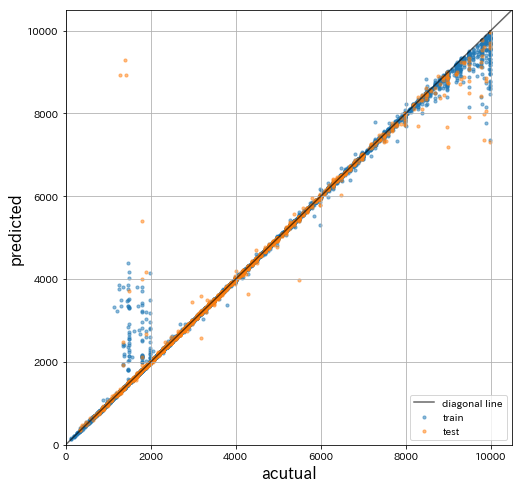

In [7]:
u_lim=10500
l_lim=0
plt.figure(figsize=(8, 8))
plt.plot([l_lim,u_lim], [l_lim,u_lim], c='k', alpha=0.6, label = 'diagonal line') # diagonal line
plt.scatter(y_train,y_train_pred,label='train',alpha=0.5,s=10)
plt.scatter(y_test,y_test_pred,label='test',alpha=0.5,s=10)
plt.xlim(l_lim,u_lim)
plt.ylim(l_lim,u_lim)
plt.xlabel('acutual', fontsize=16)
plt.ylabel('predicted', fontsize=16)
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [8]:
#モデルの保存
joblib.dump(gs, 'model/model_rf_{}.pickle'.format(searched_date)) 

['model_rf.pickle']

### 誤差の大きいレコードの確認

In [9]:
dif_train=abs(y_train_pred-y_train)
dif_test=abs(y_test_pred-y_test)
bad_pred_train=dif_train[dif_train>500]
bad_pred_test=dif_test[dif_test>500]
bad_index=list(bad_pred_train.index)
bad_index.extend(list(bad_pred_test.index))
df_bad_pred=df.loc[bad_index,:]

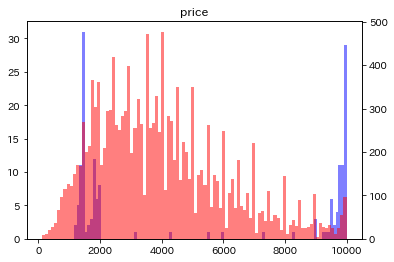

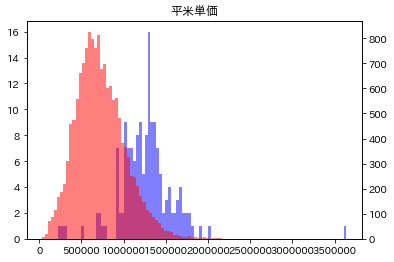

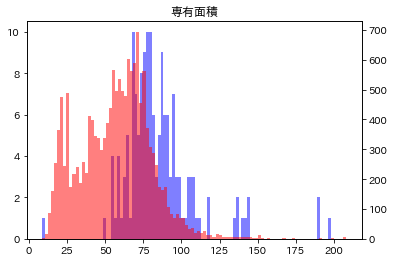

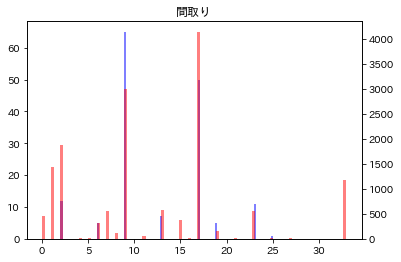

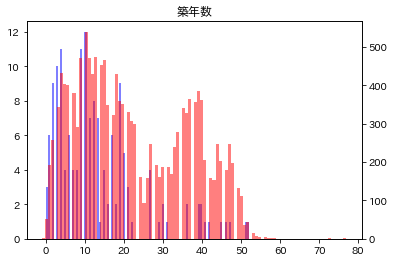

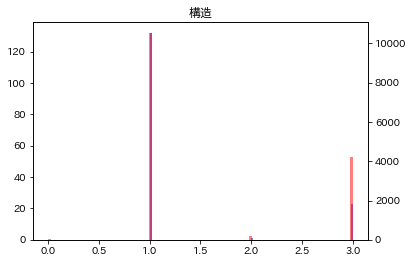

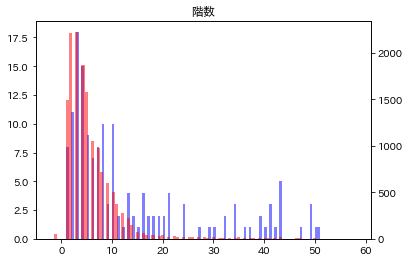

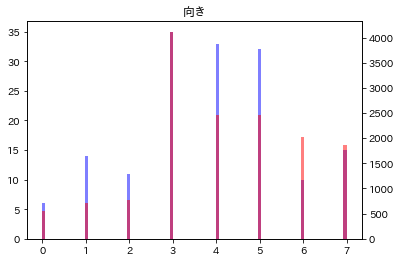

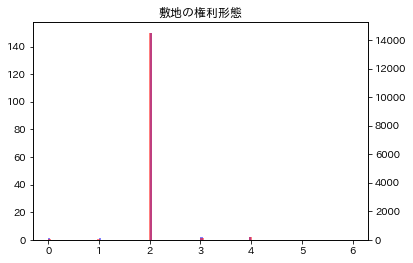

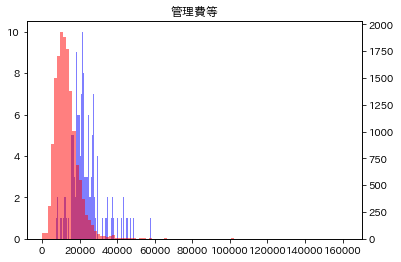

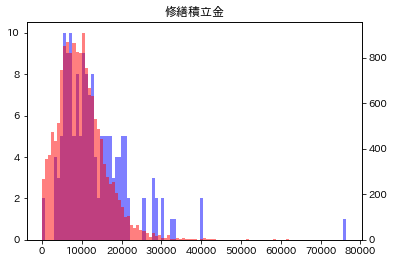

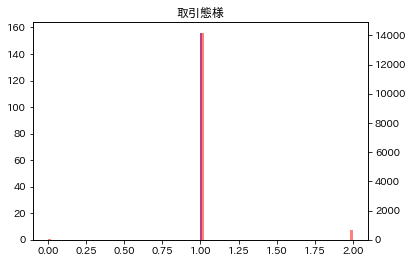

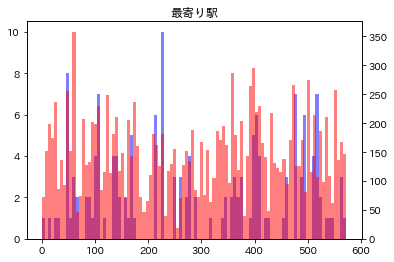

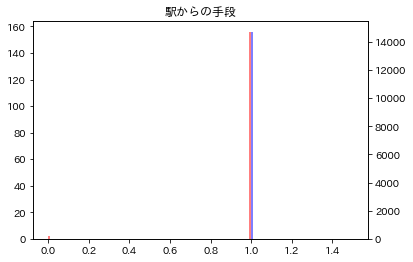

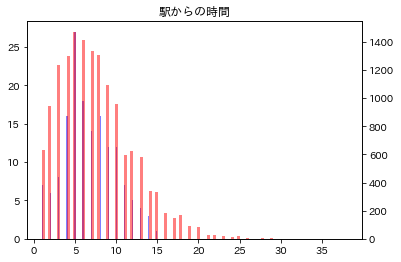

In [10]:
for col in df_bad_pred:
    fig, ax1 = plt.subplots()
    ax1.hist(df_bad_pred[col],bins=100,color='blue', alpha=0.5)
    ax2 = ax1.twinx()  # 2つのプロットを関連付ける
    ax2.hist(df[col],bins=100,color='red', alpha=0.5)
    plt.title(col)
    plt.show()